# 01 Import libraries

In [1]:
import numpy as np
import torch

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using device: {device}")

Using device: cpu


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
import pandas as pd

In [4]:
import importlib

In [5]:
%reload_ext autoreload
%autoreload 2

In [6]:
import lib
importlib.reload(lib)

<module 'lib' from 'c:\\Users\\dongq\\OneDrive\\Desktop\\New results\\Portfolio Allocation\\Learning-the-Optimal-Solution-Path\\lib\\__init__.py'>

In [7]:
from lib.fast_tensor_data_loader import FastTensorDataLoader
from lib.lsp.basis_generator import bivariate_legendre
from lib.lsp.basis_tf_module import Basis_TF_SGD
from lib.lsp.solver_lsp import train_lsp, test_lsp
from lib.lsp.loss_fn_lsp import allocation_cost

# 02 Instantiate dataset

In [8]:
# file path for Colab. May need to change this
# X_df = pd.read_csv('/content/Learning-the-Optimal-Solution-Path/experiments/fair-regression/data/X_processed.csv')
# y_df = pd.read_csv('/content/Learning-the-Optimal-Solution-Path/experiments/fair-regression/data/y_processed.csv')
decomp_cov_df = pd.read_csv('decomp_cov.csv')
mean_df = pd.read_csv('mean.csv')

In [9]:
decomp_cov = np.array(decomp_cov_df)
mean = np.array(mean_df).squeeze()

In [10]:
decomp_cov = torch.tensor(decomp_cov, dtype=torch.float32)
mean = torch.tensor(mean, dtype=torch.float32)

In [11]:
# full gradient descent uses all data points
GD_data_loader = FastTensorDataLoader(decomp_cov, mean, batch_size=len(decomp_cov), shuffle=False, )
# test data
test_data_loader = FastTensorDataLoader(decomp_cov, mean, batch_size=len(decomp_cov), shuffle=False, )

In [27]:
lam_max_2d = [1, 1]
lam_min_2d = [0, 0]
input_dim = decomp_cov.shape[1] - 1

# 03 Define Functions

In [13]:
loss_fn = allocation_cost

In [30]:
def gen_loss_gd(hyper_params, lr):
    model = Basis_TF_SGD(input_dim, basis_dim, phi_lam, intercept=False).to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    optimizer.zero_grad()
    weight = model.linear.weight.clone().detach()
    itr = 0
    for t in range(epochs):
        grad, weight, itr = train_lsp(itr, weight, GD_data_loader, model, loss_fn,
                                      optimizer, lam_min_2d, lam_max_2d, 
                                      weighted_avg=True, step_size=None,
                                      const=None, distribution='uniform', device='cpu')

    loss = test_lsp(test_data_loader, model, loss_fn, hyper_params, device)
    return loss

# 04 Tuning the learning rate for our model

In [35]:
lr_list = 0.5 ** np.arange(5, 15)

In [16]:
hyper_params = [0.3, 0.5]

Legendre polynomials

In [17]:
phi_lam = bivariate_legendre

In [18]:
epochs = 50

## Basis dimension = 5

In [19]:
basis_dim = 5

### Exact Gradient:

pick lr = .5**9

In [36]:
losses = []
for lr in lr_list:
    loss = gen_loss_gd(hyper_params, lr)

    print(f"learning rate: {lr}\t loss: {loss}")
    losses.append(loss)

learning rate: 0.03125	 loss: 5.730034243151643e+34
learning rate: 0.015625	 loss: 29631407194112.0
learning rate: 0.0078125	 loss: 10035378.0
learning rate: 0.00390625	 loss: 4.2239532470703125
learning rate: 0.001953125	 loss: 4.302826881408691
learning rate: 0.0009765625	 loss: 4.433686256408691
learning rate: 0.00048828125	 loss: 4.65755558013916
learning rate: 0.000244140625	 loss: 4.754791736602783
learning rate: 0.0001220703125	 loss: 4.894443988800049
learning rate: 6.103515625e-05	 loss: 4.991694927215576


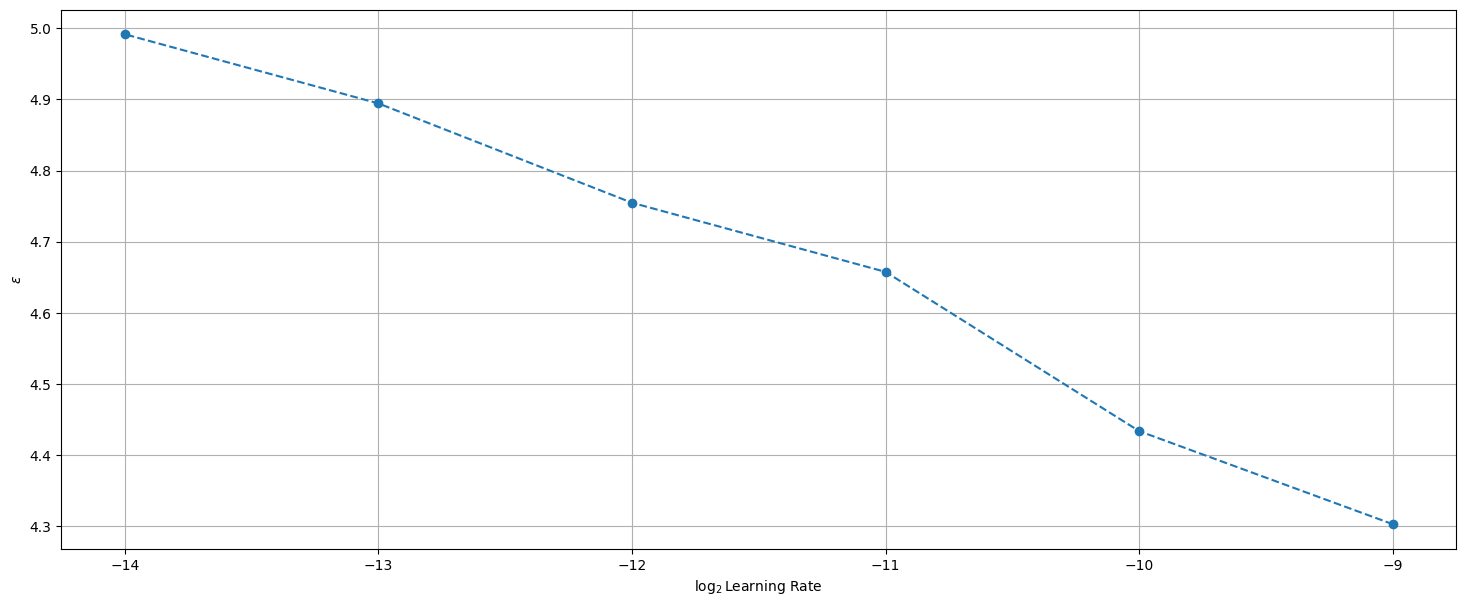

In [37]:
# plot result of our method:
plt.figure(figsize=(18,7))
plt.plot(np.log2(lr_list[4:]), losses[4:], '--o')
plt.xlabel('$\\log_2$Learning Rate')
plt.ylabel("$\\epsilon$")
plt.grid(True)

## Basis dimension = 7

In [38]:
basis_dim = 7

### Exact Gradient:

pick lr = .5**10

In [39]:
losses = []
for lr in lr_list:
    loss = gen_loss_gd(hyper_params, lr)

    print(f"learning rate: {lr}\t loss: {loss}")
    losses.append(loss)

learning rate: 0.03125	 loss: nan
learning rate: 0.015625	 loss: 2.4470184726327837e+21
learning rate: 0.0078125	 loss: 6546917.5
learning rate: 0.00390625	 loss: 4.27628231048584
learning rate: 0.001953125	 loss: 4.4662041664123535
learning rate: 0.0009765625	 loss: 4.427763938903809
learning rate: 0.00048828125	 loss: 4.640438079833984
learning rate: 0.000244140625	 loss: 4.781982421875
learning rate: 0.0001220703125	 loss: 4.887707710266113
learning rate: 6.103515625e-05	 loss: 4.983058452606201


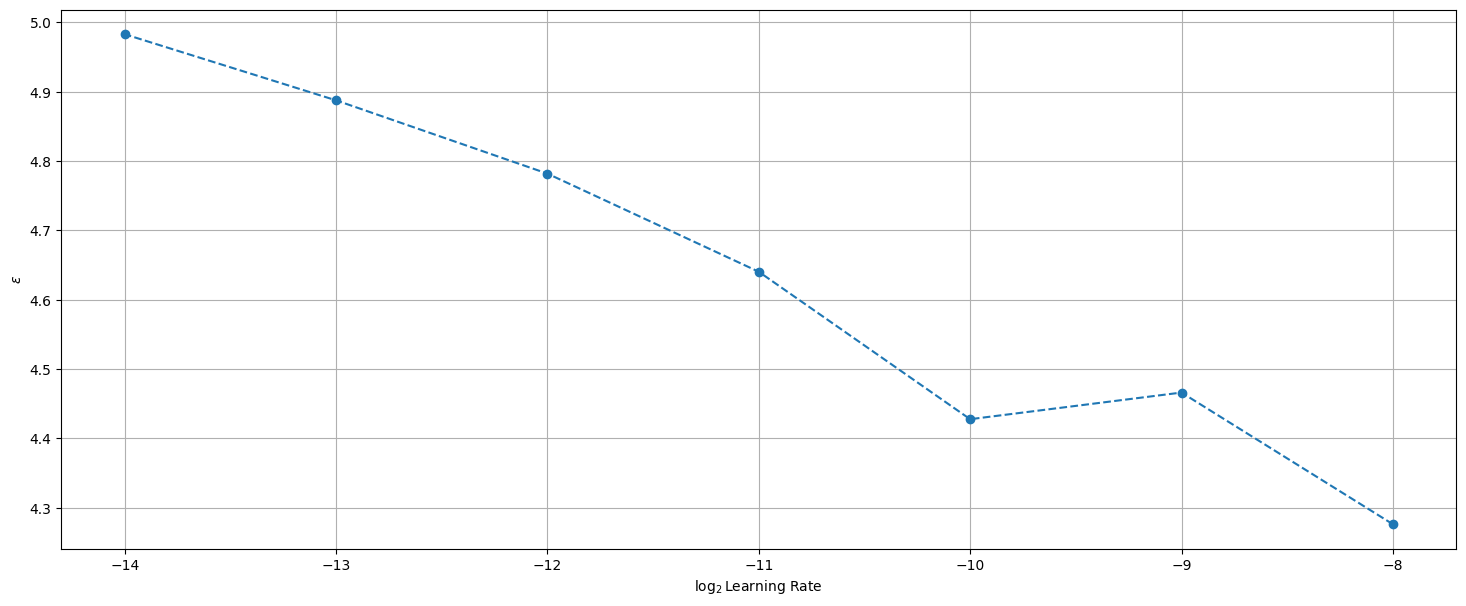

In [40]:
# plot result of our method:
plt.figure(figsize=(18,7))
plt.plot(np.log2(lr_list[3:]), losses[3:], '--o')
plt.xlabel('$\\log_2$Learning Rate')
plt.ylabel("$\\epsilon$")
plt.grid(True)

## Basis dimension = 9

In [41]:
basis_dim = 9

### Exact Gradient:

pick lr = .5**10

In [42]:
losses = []
for lr in lr_list:
    loss = gen_loss_gd(hyper_params, lr)

    print(f"learning rate: {lr}\t loss: {loss}")
    losses.append(loss)

learning rate: 0.03125	 loss: nan
learning rate: 0.015625	 loss: 7.97613694148507e+25
learning rate: 0.0078125	 loss: 1086.583251953125
learning rate: 0.00390625	 loss: 93.53990936279297
learning rate: 0.001953125	 loss: 4.260953426361084
learning rate: 0.0009765625	 loss: 4.4451189041137695
learning rate: 0.00048828125	 loss: 4.640130996704102
learning rate: 0.000244140625	 loss: 4.806320667266846
learning rate: 0.0001220703125	 loss: 4.906430244445801
learning rate: 6.103515625e-05	 loss: 4.970592975616455


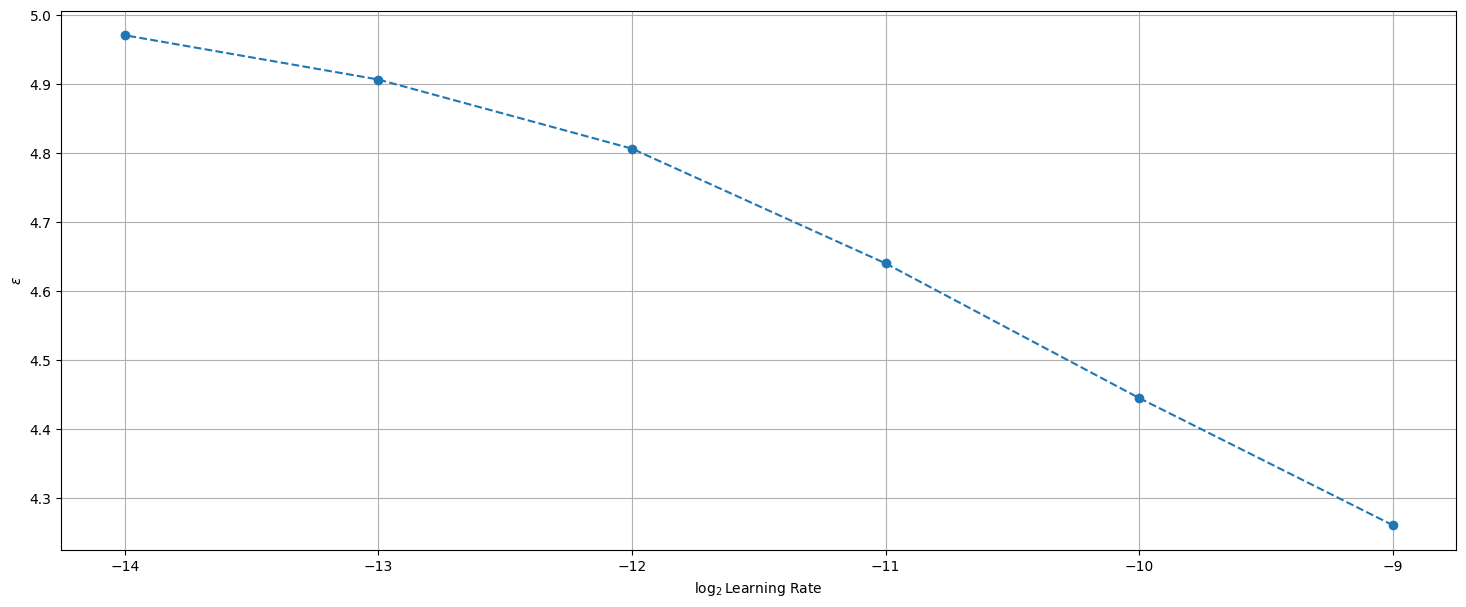

In [43]:
# plot result of our method:
plt.figure(figsize=(18,7))
plt.plot(np.log2(lr_list[4:]), losses[4:], '--o')
plt.xlabel('$\\log_2$Learning Rate')
plt.ylabel("$\\epsilon$")
plt.grid(True)